## Classifying Caesarian Deliveries
For my "just Machine Learn it" attempt, I selected the [Caesarian Section Classification Dataset](https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset "Caesarian Section Dataset"). 

1. Layout the data into a dataset X and targets y.
2. Choose regression, classification, or clustering and build the best model you can from it.
3. Report an evaluation of the model built
4. Visualize aspects of your model (optional)
5. Compare and contrast different model families


### Dataset Information

Downloaded 7/20/2019. 

|Characteristics| |
|-----|-----|
| Data Set Characteristics | Univariate|
| Attribute Charactersistics| Integer|
| Num. Attributes| 5|
| Num. Instances|80|
|Tasks|Classification|


#### Attribute Information:

The author chose to track: 
- age 
- delivery number
- delivery time 
- blood pressure 
- heart status

The author classifies delivery time to Premature, Timely and Latecomer. As like the delivery time they classify  blood pressure in three statuses of Low, Normal and High moods. Heart Problem is classified as apt and inept. 

+ Age { Unique Ages: 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 } 
+ Delivery Number { 1,2,3,4 } 
+ Delivery Time { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer} 
+ Blood Pressure { 2,1,0 } -> {0 = low , 1 = normal , 2 = high } 
+ Heart Problem { 1,0 } -> {0 = apt, 1 = inept } 
+ Caesarian { 0,1 } -> {0 = No, 1 = Yes } 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import Rank2D, RadViz, ParallelCoordinates

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('caesarian.csv')

In [2]:
data.head()

,Age,Delivery Number,Delivery Time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [3]:
train = pd.DataFrame(data)

In [4]:
train.head()

,Age,Delivery Number,Delivery Time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [5]:
#Cleaning up Column Names
train = train.rename(columns={'Delivery Number':'Delivery_Number','Delivery Time':'Delivery_Time', 'Blood Pressure':'Blood_Pressure','Heart Problem':'Heart_Problem'}) 

In [6]:
print("{} instances with {} features\n".format(*train.shape))

print(train.groupby('Delivery_Time')['Delivery_Time'].count())

80 instances with 6 features

Delivery_Time
0    46
1    17
2    17
Name: Delivery_Time, dtype: int64


In [7]:
train.head()

,Age,Delivery_Number,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [8]:
number_patients = train.shape[0]
number_caesarian = len(train[train.Caesarian==1])

proportion_caesarian = number_caesarian / number_patients

f"The proportion of Caesarian deliveries is: {proportion_caesarian}"

'The proportion of Caesarian deliveries is: 0.575'

In [9]:
#How many women had a caesarian delivery on their first child?
cesarean_first = (len(train[(train['Caesarian']==1) & (train['Delivery_Number']==1)]))
first_delivery = (len(train[train['Delivery_Number']==1]))
prop_first_cesarean = cesarean_first / first_delivery

f"The proportion of women who had a Cesarean delivery for the first child is: {prop_first_cesarean}"

'The proportion of women who had a Cesarean delivery for the first child is: 0.5365853658536586'

In [10]:
#How many mother's that gave birth using Cesarean section method were under the age of 30?
under30_cesarean = (len(train[(train['Caesarian']==1) & (train['Age']<=30)]))
numberunder30 = len(train[train['Age']<=30])
propunder30cesarean = under30_cesarean / numberunder30
f"{propunder30cesarean} is the proportion of Women under 30 who gave birth using Cesarean section."

'0.5357142857142857 is the proportion of Women under 30 who gave birth using Cesarean section.'

In [11]:
#Verify our field types.
train.dtypes

Age                int64
Delivery_Number    int64
Delivery_Time      int64
Blood_Pressure     int64
Heart_Problem      int64
Caesarian          int64
dtype: object

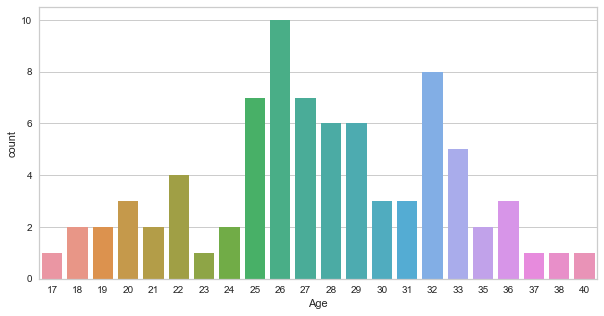

In [12]:
#Getting a better idea of the age distribution in our dataset.
categorical_attributes = data.select_dtypes(include=['int64'])
plt.figure(figsize=[10,5])
sns.countplot(data= categorical_attributes, x= 'Age')

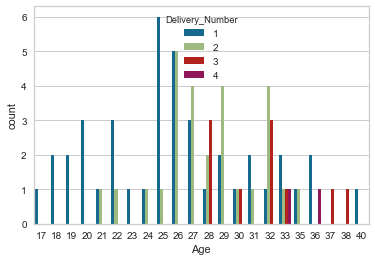

In [13]:
ax = sns.countplot(x="Age", hue = 'Delivery_Number', data=train)

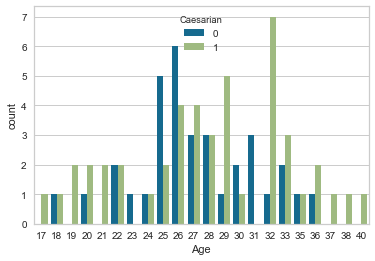

In [14]:
ax = sns.countplot(x="Age", hue = 'Caesarian', data=train)

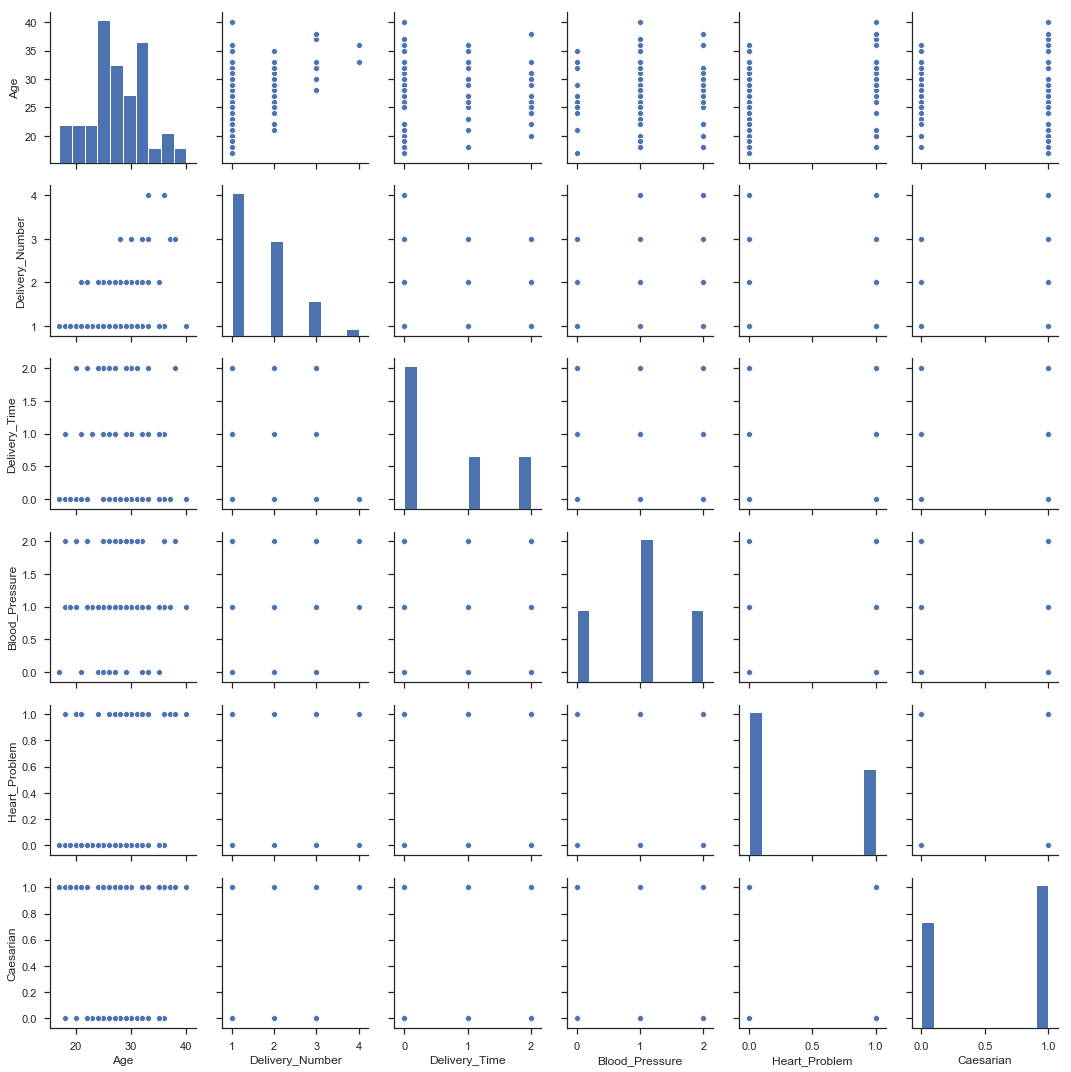

In [15]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
g = sns.pairplot(train)

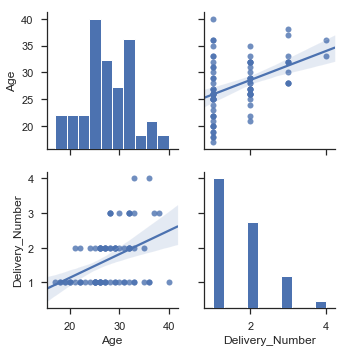

In [16]:
g = sns.pairplot(train, vars=['Age','Delivery_Number'], kind='reg')

In [17]:
df = train.groupby(['Age','Caesarian'])['Caesarian'].agg('count').to_frame('Counts').reset_index()
df = df.set_index("Caesarian")
df = df.drop(0)
#Now we have a DataFrame containing the counts of Cesarean Sections by Age
df.head()

,Age,Counts
Caesarian,,
1,17,1
1,18,1
1,19,2
1,20,2
1,21,2


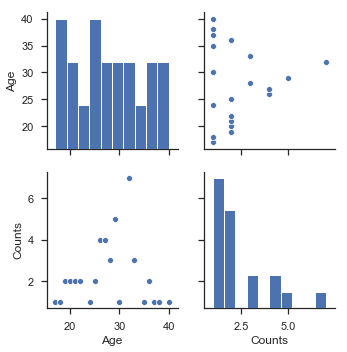

In [18]:
gg = sns.pairplot(df, vars=['Age','Counts'])

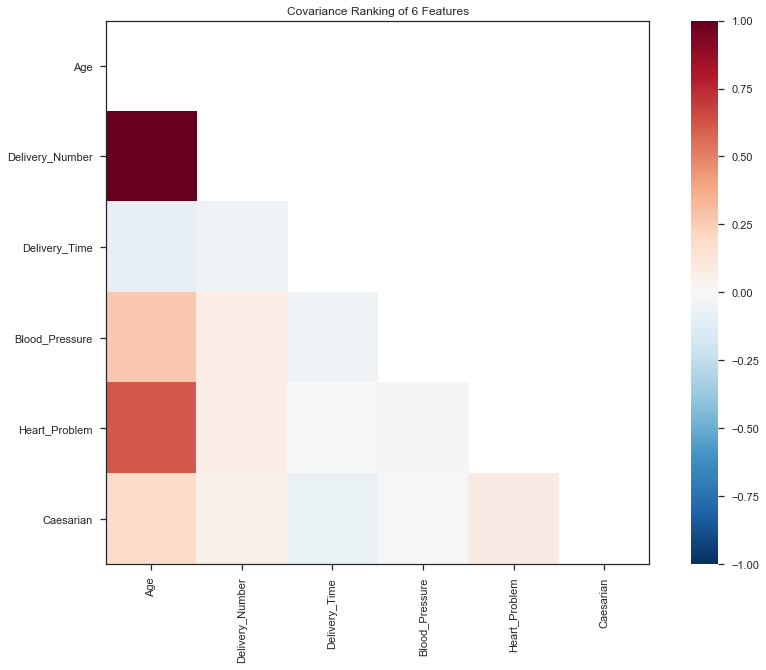

In [19]:
visualizer = Rank2D(algorithm="covariance", size=(1080,720))
visualizer.fit_transform(train)
visualizer.poof()

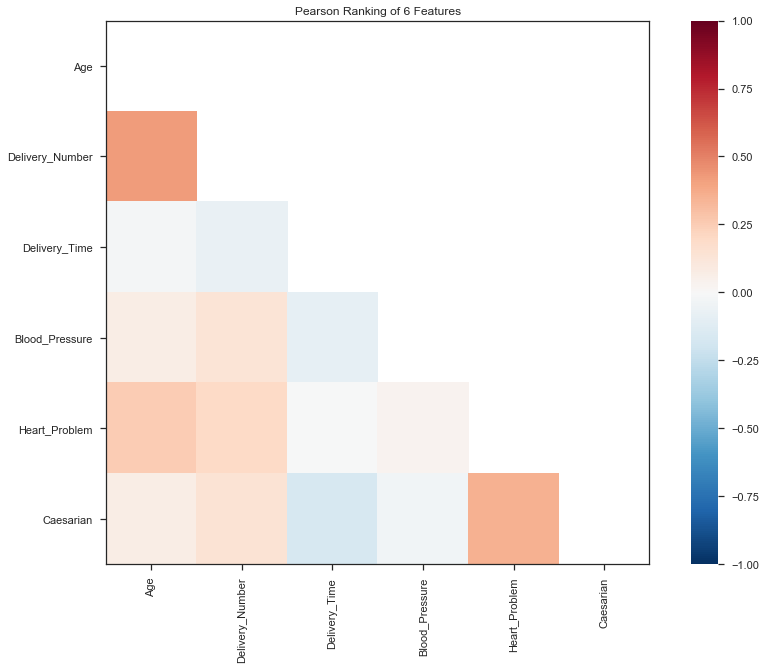

In [20]:
visualizer = Rank2D(algorithm="pearson", size=(1080,720))
visualizer.fit_transform(train)
visualizer.poof()

### Model Scoring

Let's take a look at several models and run them through several models to see what we should explore.


In [21]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, scale
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [22]:
models = [
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

features = ["Age","Delivery_Number","Blood_Pressure","Heart_Problem"]
target = ["Caesarian"]
X = train[features]
y = train[target]

for model in models:
    score_model(X,y,model)

SGDClassifier: 0.7692307692307693
KNeighborsClassifier: 0.7586206896551724
LogisticRegression: 0.7578947368421053
LogisticRegressionCV: 0.7422680412371134
BaggingClassifier: 0.9484536082474228
ExtraTreesClassifier: 0.9425287356321839
RandomForestClassifier: 0.945054945054945


### Now Let's Visualize It

So we wrote a function and looped through multiple model scores using the pipeline. Now we can do the same with the YellowBrick Classification Report visualizer.

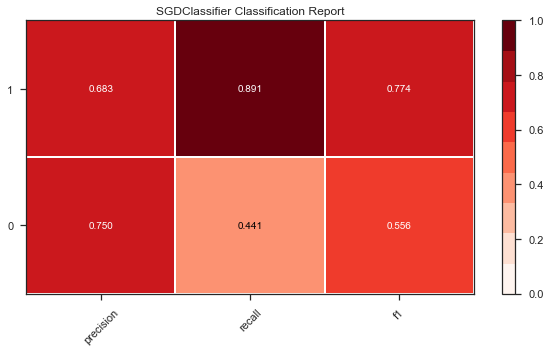

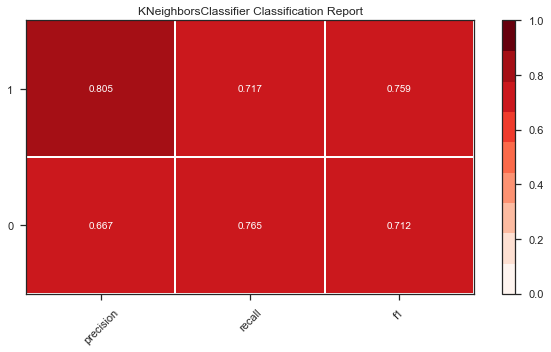

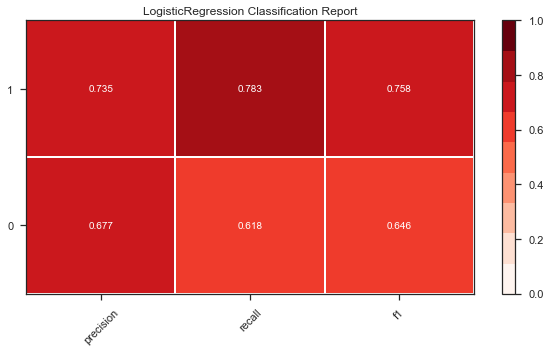

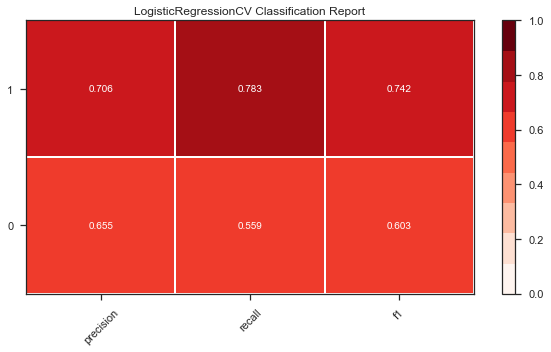

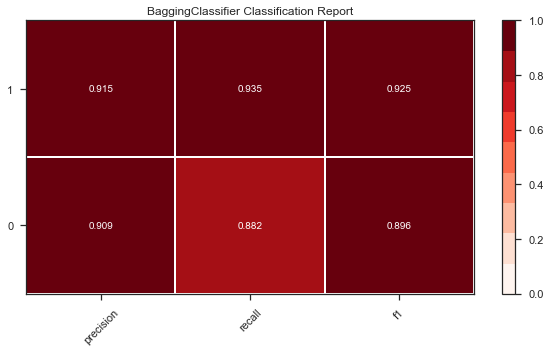

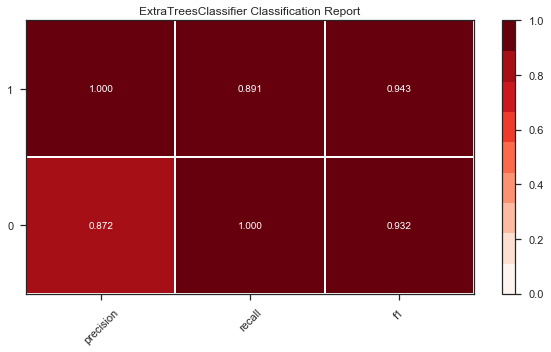

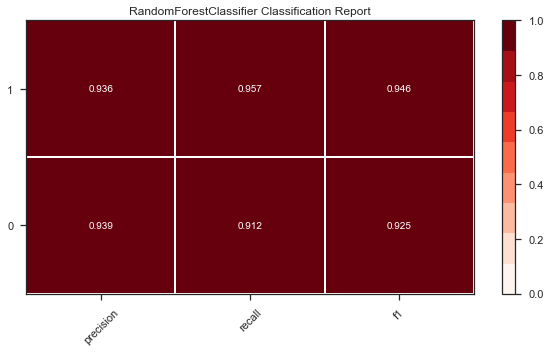

In [23]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['0', '1'], 
        cmap="Reds", size=(600, 360)
    )
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

for model in models:
    visualize_model(X, y, model)

### So?

Looks like we should look at Classifiers instead of Logistic Regression but we'll look at both since LR scored around 75% and then we'll try Random Forest.

## Logistic Regression

In [24]:
features = ["Age","Delivery_Number","Blood_Pressure","Heart_Problem"]
target = ["Caesarian"]
X = train[features]
y = train[target]

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.1, random_state=0)

In [25]:
print(X.shape,y.shape)

(80, 4) (80, 1)


In [26]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predicted = lr.predict(X_train)

In [28]:
predictions = lr.predict(X_test)

test_predictions = pd.DataFrame({
    "Age": X_test["Age"],
    "Caesarian": predictions
})

In [29]:
test_predictions.head(10)

,Age,Caesarian
50,33,1
27,30,0
30,25,0
77,29,0
45,28,1
71,29,1
66,28,1
68,25,0


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [31]:
expected = y_test
predicted = lr.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['Age','Caesarian'])
print(classificationReport)

              precision    recall  f1-score   support

         Age       0.50      0.67      0.57         3
   Caesarian       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



In [32]:
predictions = lr.predict(X_test)

test_deliveryPredictions = pd.DataFrame({
    "Delivery_Number": X_test["Age"],
    "Caesarian": predictions
})

In [33]:
expected = y_test
predicted = lr.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['Delivery_Number','Caesarian'])
print(classificationReport)

                 precision    recall  f1-score   support

Delivery_Number       0.50      0.67      0.57         3
      Caesarian       0.75      0.60      0.67         5

       accuracy                           0.62         8
      macro avg       0.62      0.63      0.62         8
   weighted avg       0.66      0.62      0.63         8



Well - LR didn't perform near as well as it could at predicting the likelihood of Caesarian delivery - onto Random Forest which scored very high in the visualizer.

## Random Forest

In [53]:
# Selecting 100 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=100)
features = ["Age","Delivery_Number","Blood_Pressure","Heart_Problem"]
target = ["Caesarian"]

X = train[features]
y = train[target]

y = LabelEncoder().fit_transform(y)

X = OneHotEncoder().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X,y, test_size=.1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rf.score(X_test, y_test)

0.75

In [55]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Normal Delivery","Cesarean"])
print(classificationReport)

                 precision    recall  f1-score   support

Normal Delivery       0.67      0.67      0.67         3
       Cesarean       0.80      0.80      0.80         5

       accuracy                           0.75         8
      macro avg       0.73      0.73      0.73         8
   weighted avg       0.75      0.75      0.75         8



### Summary of Logistic Regression v. Random Forest Classifier

Like our initial model exploration incidcating, Random Forest seems to have performed better than Logistic Regression at predicting Caesarian delivery. But not as great as indicated by the model evaluation classifiers.

Future steps to improve performance:

- Try out hypertuning
- Use gridsearch to see what variables work best at predicting the outcome.